In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import resnet50
import os
import tensorflow as tf
import matplotlib

matplotlib.style.use('ggplot')

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
image_shape = (160, 120)
training_dir = 'D:\Blood Cell Detector\dataset2-master\dataset2-master\images\TRAIN'
valid_dir = 'D:\Blood Cell Detector\dataset2-master\dataset2-master\images\TEST'
test_dir = 'D:\Blood Cell Detector\dataset2-master\dataset2-master\images\TEST_SIMPLE'

In [3]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=30, horizontal_flip=True)

trainGen = dataGen.flow_from_directory(training_dir, shuffle=True, target_size=image_shape)
validGen = dataGen.flow_from_directory(valid_dir, shuffle=True, target_size=image_shape)
testGen = dataGen.flow_from_directory(test_dir, shuffle=True, target_size=image_shape)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', input_shape=(160, 120, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='tanh'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(units=128, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(units=4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 118, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 59, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 57, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7488)              0

In [5]:
history = model.fit(trainGen, epochs=30, validation_data=validGen)

Epoch 1/30
312/312 [==============================] - 173s 506ms/step - loss: 1.4331 - accuracy: 0.2534 - val_loss: 1.3407 - val_accuracy: 0.3631
Epoch 2/30
312/312 [==============================] - 164s 526ms/step - loss: 1.3201 - accuracy: 0.3612 - val_loss: 1.1301 - val_accuracy: 0.4688
Epoch 3/30
312/312 [==============================] - 172s 552ms/step - loss: 1.1448 - accuracy: 0.4825 - val_loss: 0.9946 - val_accuracy: 0.5356
Epoch 4/30
312/312 [==============================] - 163s 523ms/step - loss: 0.9781 - accuracy: 0.5613 - val_loss: 0.9063 - val_accuracy: 0.5915
Epoch 5/30
312/312 [==============================] - 166s 533ms/step - loss: 0.8604 - accuracy: 0.6137 - val_loss: 0.7918 - val_accuracy: 0.6639
Epoch 6/30
312/312 [==============================] - 168s 540ms/step - loss: 0.7586 - accuracy: 0.6565 - val_loss: 0.6732 - val_accuracy: 0.7037
Epoch 7/30
312/312 [==============================] - 163s 524ms/step - loss: 0.7078 - accuracy: 0.6632 - val_loss: 0.6271 -

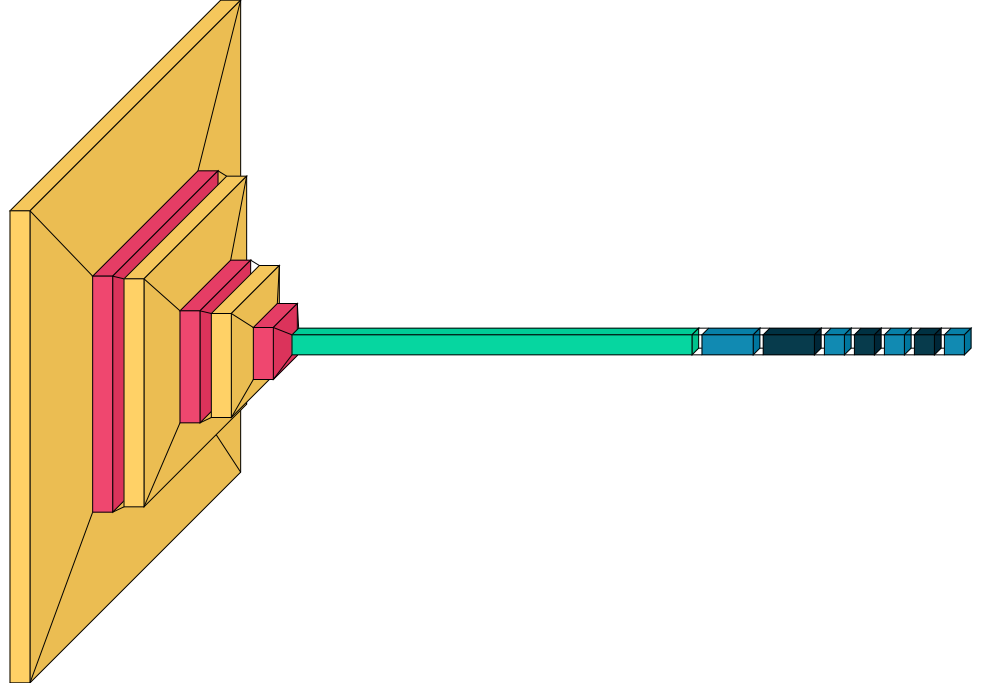

In [12]:
import visualkeras

visualkeras.layered_view(model)

In [6]:
print("Final Accuracy:", history.history['accuracy'][-1])
print("Final Val Accuracy:", history.history['val_accuracy'][-1])

Final Accuracy: 0.9063975214958191
Final Val Accuracy: 0.8383594751358032


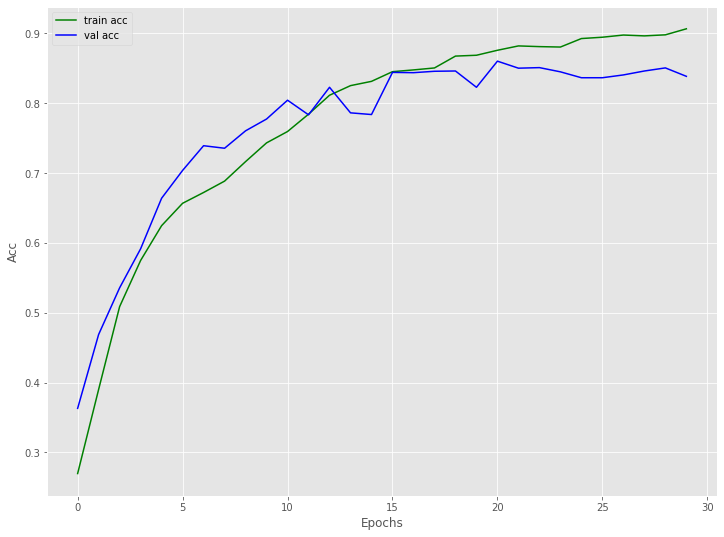

In [7]:
plt.figure(figsize=(12, 9))
plt.plot(history.history['accuracy'], color='green', linestyle='-', label='train acc')
plt.plot(history.history['val_accuracy'], color='blue', linestyle='-', label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

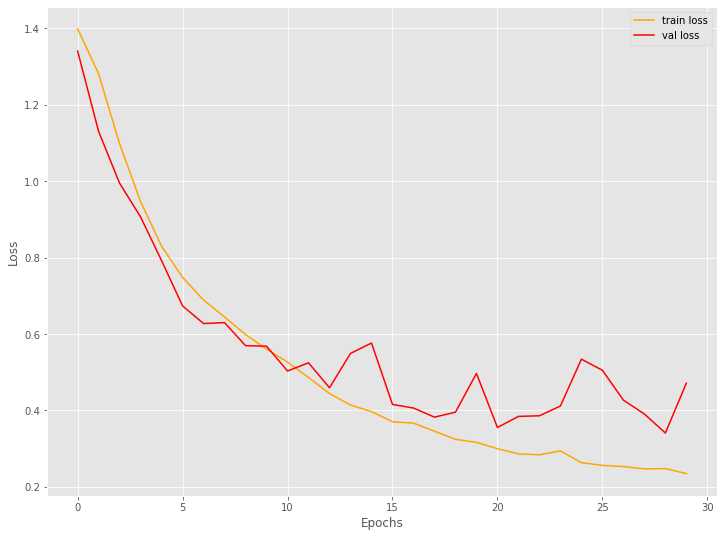

In [8]:
plt.figure(figsize=(12, 9))
plt.plot(history.history['loss'], color='orange', linestyle='-', label='train loss')
plt.plot(history.history['val_loss'], color='red', linestyle='-', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
model.save('model-blood-cell.h5')

In [ ]:
import numpy as np

img = tf.keras.preprocessing.image.load_img(r'D:\Blood Cell Detector\dataset2-master\dataset2-master\images\TEST_SIMPLE\MONOCYTE\_1_4511.jpeg', target_size=(160, 120))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
np.round(preds, decimals=2)